In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [2]:
# Generate a dataset of points in two concentric circles
cordinate, target = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)
print(f'coordinates:{cordinate[:5]}')
print(f'target:{target[:5]}')

coordinates:[[ 0.45259239  0.16843331]
 [-0.43802652  0.11990049]
 [-0.5322243   0.18435902]
 [-0.30140181  0.40078207]
 [ 0.44560223 -0.89493556]]
target:[1 1 1 1 0]


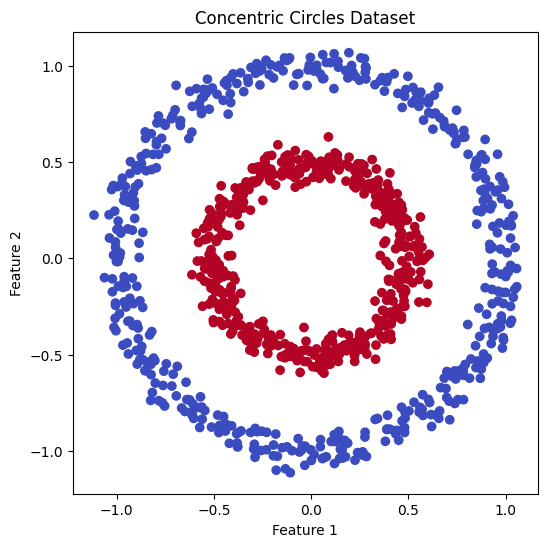

In [3]:
# Convert data to PyTorch tensors
X = torch.FloatTensor(cordinate)
y = torch.LongTensor(target)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(X, y)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Plot the data points and save as JPG
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Concentric Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig('concentric_circles_dataset.jpg', format='jpg', dpi=300)
plt.show()

In [4]:
# Training Loop Function
def train_model(model, optimizer, dataloader, epochs=20):
    model.train()
    for epoch in range(epochs):
        for data, targets in dataloader:
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, targets)
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Backward pass and optimization
            loss.backward()
            #optimizer step
            optimizer.step()
        # Print loss every 5 epochs
        if (epoch+1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [5]:
# Function to Plot Decision Boundaries and save as JPG
def plot_decision_boundary(model, X, y, title, filename):
    # Set model to evaluation mode
    model.eval()
    # Generate a grid of points covering the data range
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.inference_mode():
        outputs = model(grid)
        _, predictions = torch.max(outputs, 1)
    predictions = predictions.reshape(xx.shape)
    # Plot decision boundary and data points
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    # Save the plot as a JPG image
    plt.savefig(filename, format='jpg', dpi=300)
    plt.show()

In [6]:
# Model A: Linear Model Without Activation Functions
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 2)

    def forward(self, x):
        out = self.linear(x)
        return out

In [7]:
torch.manual_seed(42)
model_a = LinearModel()

In [8]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizers
optimizer_a = torch.optim.SGD(model_a.parameters(), lr=0.1)

In [9]:
# Training Model A
print("Training Model A (Linear Model)...")
train_model(model_a, optimizer_a, dataloader)

Training Model A (Linear Model)...
Epoch [5/20], Loss: 0.7037
Epoch [10/20], Loss: 0.6962
Epoch [15/20], Loss: 0.6932
Epoch [20/20], Loss: 0.7014


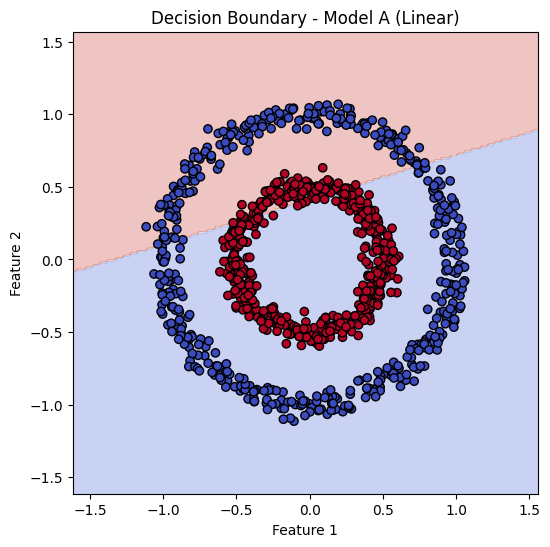

In [10]:
# Plotting for Model A and saving as JPG
plot_decision_boundary(model_a, X, y, 'Decision Boundary - Model A (Linear)', 'model_a_decision_boundary.jpg')

In [11]:
# Model B: Non-Linear Model with Activation Functions
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )

    def forward(self, x):
        out = self.network(x)
        return out

torch.manual_seed(42)
model_b = NonLinearModel()

#optimizer
optimizer_b = torch.optim.SGD(model_b.parameters(), lr=0.1)

In [12]:
# Training Model B
print("\nTraining Model B (Non-Linear Model)...")
train_model(model_b, optimizer_b, dataloader)


Training Model B (Non-Linear Model)...
Epoch [5/20], Loss: 0.6026
Epoch [10/20], Loss: 0.3558
Epoch [15/20], Loss: 0.1753
Epoch [20/20], Loss: 0.1318


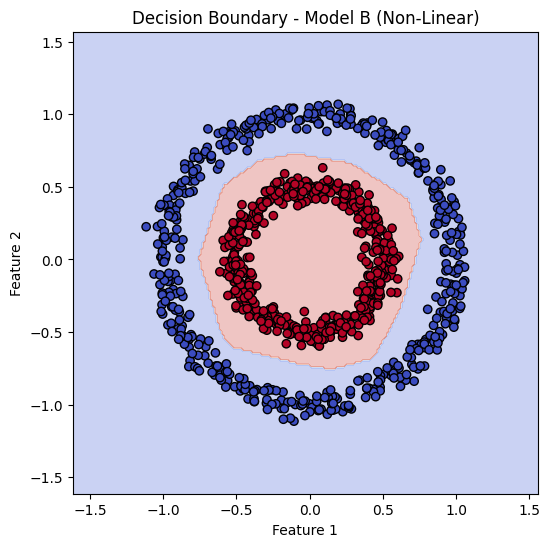

In [13]:
# Plotting for Model B and saving as JPG
plot_decision_boundary(model_b, X, y, 'Decision Boundary - Model B (Non-Linear)', 'model_b_decision_boundary.jpg')